Part II: Data visualization and statistics

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import stats libraries
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest

In [3]:
# read our csv into a DataFrame
df = pd.read_csv("diabetes_data_clean.csv")
df

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


(array([  1.,  44.,  83., 103.,  91., 118.,  46.,  29.,   1.,   4.]),
 array([16. , 23.4, 30.8, 38.2, 45.6, 53. , 60.4, 67.8, 75.2, 82.6, 90. ]),
 <BarContainer object of 10 artists>)

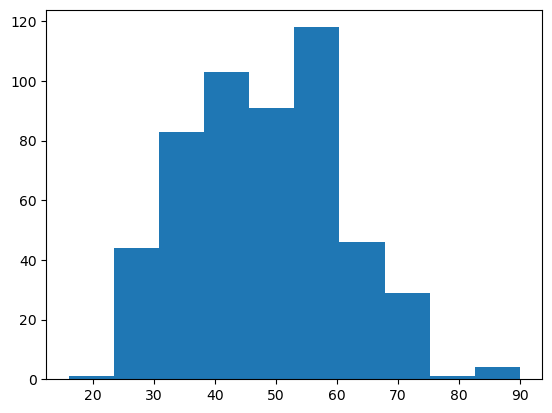

In [4]:
# examine age with histogram
plt.hist(df['age'])

In [5]:
df['age'].mean()

48.02884615384615

In [7]:
df['age'].median()

47.5

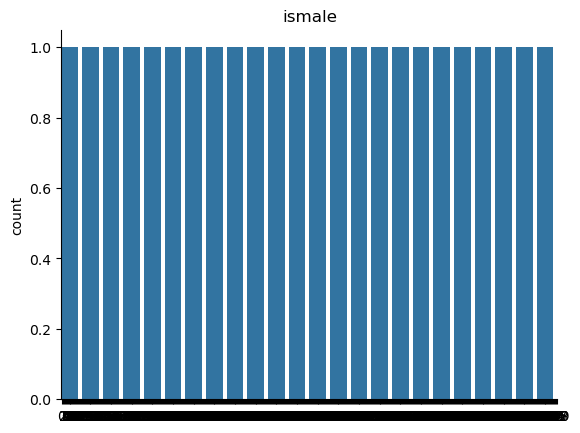

In [9]:
# create a countplot for ismale
sns.countplot(df['ismale'])
plt.title('ismale')
sns.despine()

In [12]:
columns = df.columns[1:]
columns

Index(['ismale', 'polyuria', 'polydipsia', 'sudden weight loss', 'weakness',
       'polyphagia', 'genital thrush', 'visual blurring', 'itching',
       'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

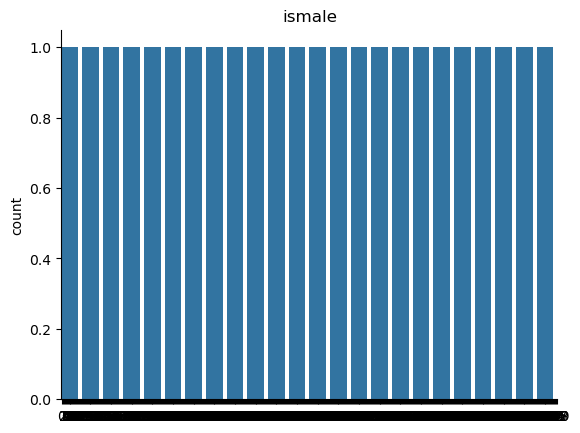

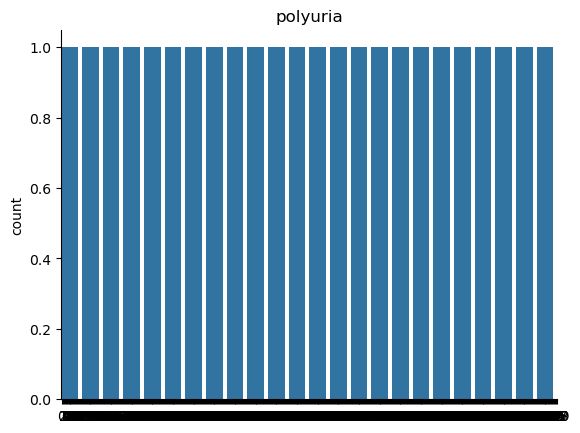

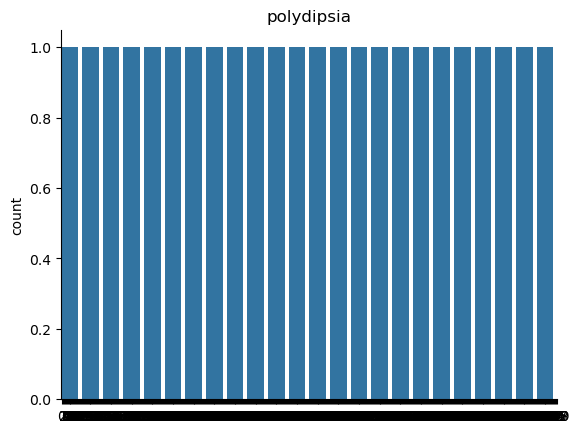

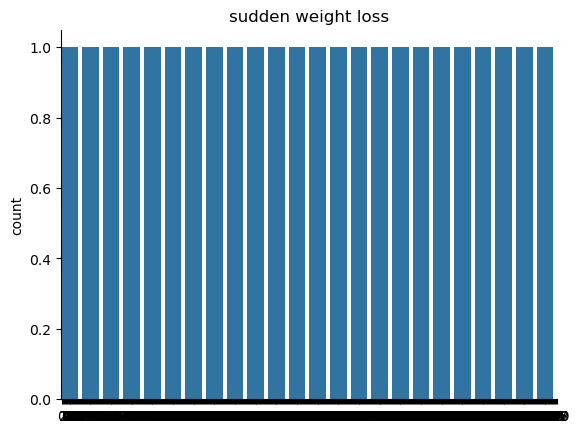

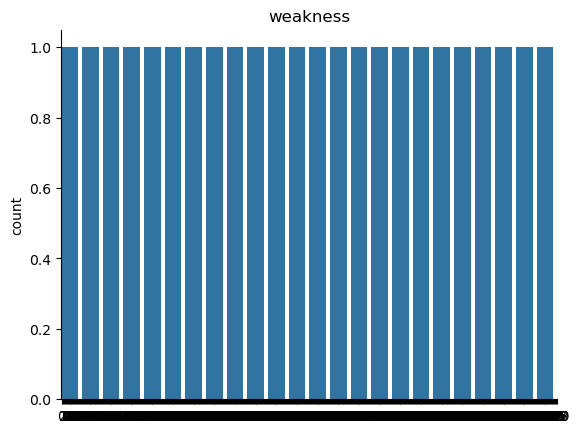

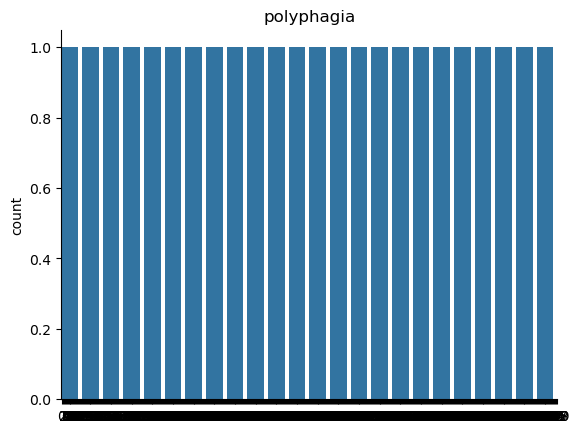

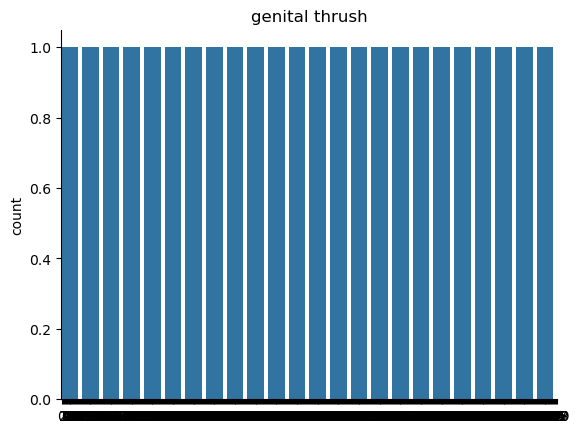

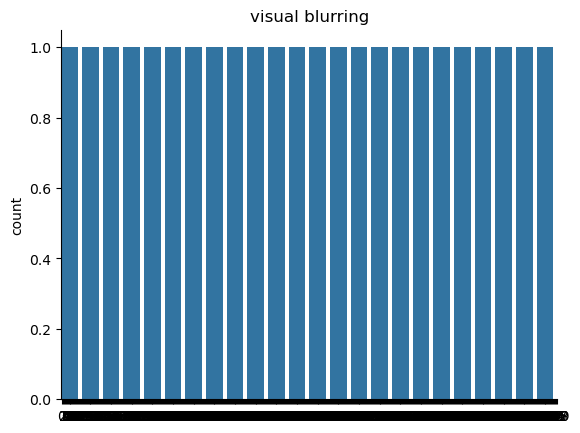

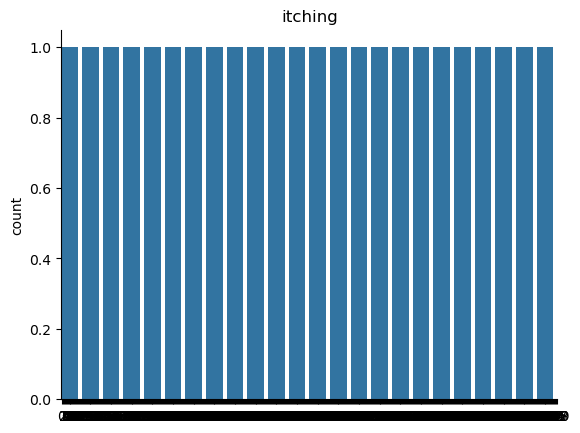

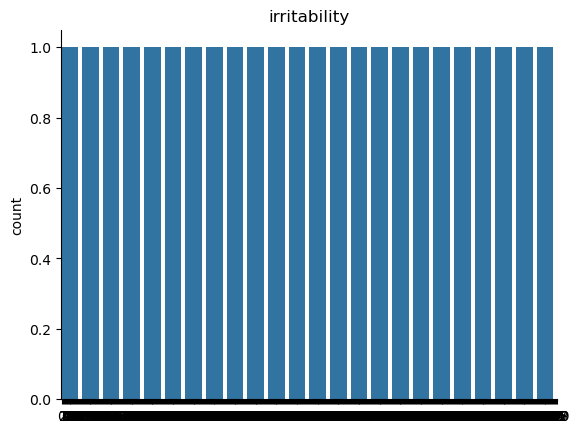

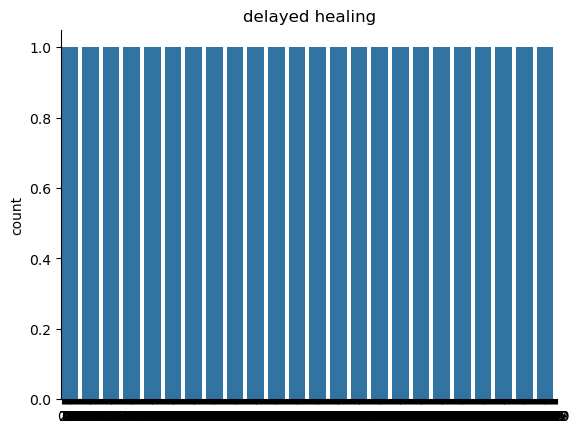

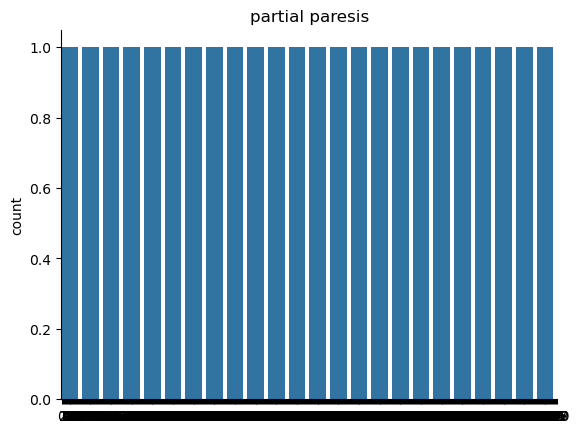

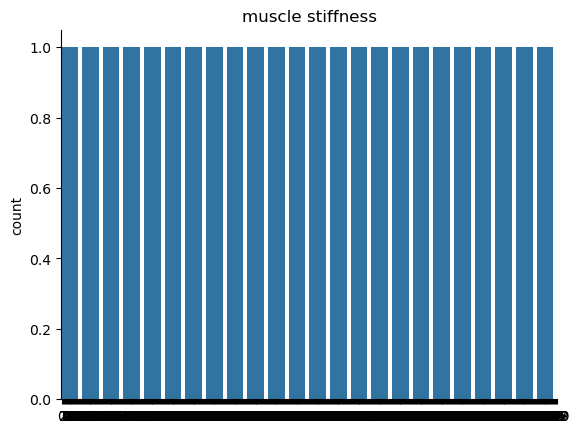

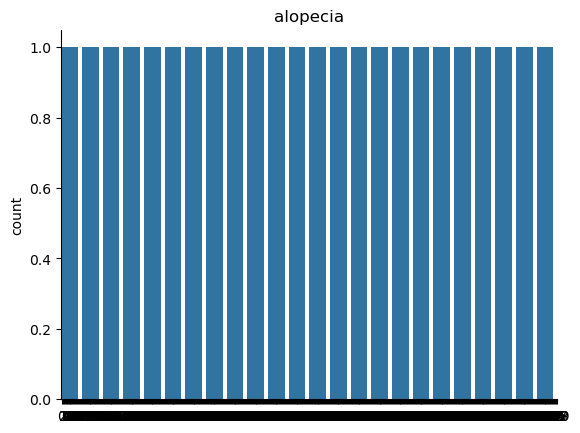

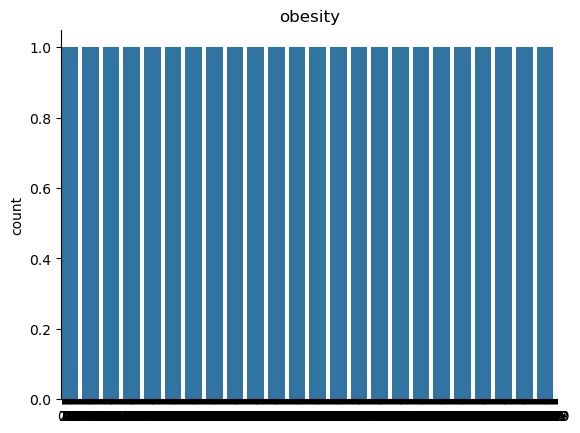

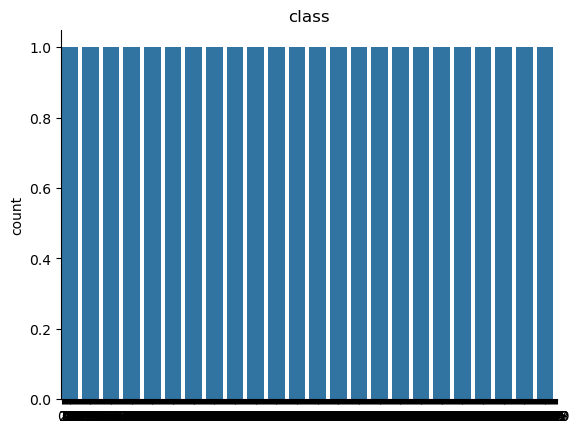

In [13]:
# iteractively plot countplot
for column in columns:
    sns.countplot(df[column])
    plt.title(column)
    sns.despine()
    plt.show()

### Questions:
1. Is obesity related to diabetes status?
2. Is age related to diabetes status?

In [19]:
obesity_diabetes_crosstab = pd.crosstab(df['class'], df['obesity'])
obesity_diabetes_crosstab

obesity,0,1
class,,
0,173,27
1,259,61


In [18]:
chi2_contingency(obesity_diabetes_crosstab)

Chi2ContingencyResult(statistic=2.3274739583333344, pvalue=0.12710799319896815, dof=1, expected_freq=array([[166.15384615,  33.84615385],
       [265.84615385,  54.15384615]]))

In [21]:
ismale_diabetes_crosstab = pd.crosstab(df['class'], df['ismale'])
ismale_diabetes_crosstab

ismale,0,1
class,,
0,19,181
1,173,147


In [22]:
chi2_contingency(ismale_diabetes_crosstab)

Chi2ContingencyResult(statistic=103.03685927972558, pvalue=3.289703730553317e-24, dof=1, expected_freq=array([[ 73.84615385, 126.15384615],
       [118.15384615, 201.84615385]]))

In [23]:
polyuria_diabetes_crosstab = pd.crosstab(df['class'], df['polyuria'])
polyuria_diabetes_crosstab

polyuria,0,1
class,,
0,185,15
1,77,243


In [25]:
chi2_contingency(polyuria_diabetes_crosstab)

Chi2ContingencyResult(statistic=227.86583895496773, pvalue=1.7409117803442155e-51, dof=1, expected_freq=array([[100.76923077,  99.23076923],
       [161.23076923, 158.76923077]]))

In [26]:
ismale_vs_polyuria_diabetes_crosstab = pd.crosstab(df['ismale'], df['polyuria'])
ismale_vs_polyuria_diabetes_crosstab

polyuria,0,1
ismale,,
0,63,129
1,199,129


In [27]:
chi2_contingency(ismale_vs_polyuria_diabetes_crosstab)

Chi2ContingencyResult(statistic=36.49184228561174, pvalue=1.5330652930649977e-09, dof=1, expected_freq=array([[ 96.73846154,  95.26153846],
       [165.26153846, 162.73846154]]))

<Axes: xlabel='class', ylabel='age'>

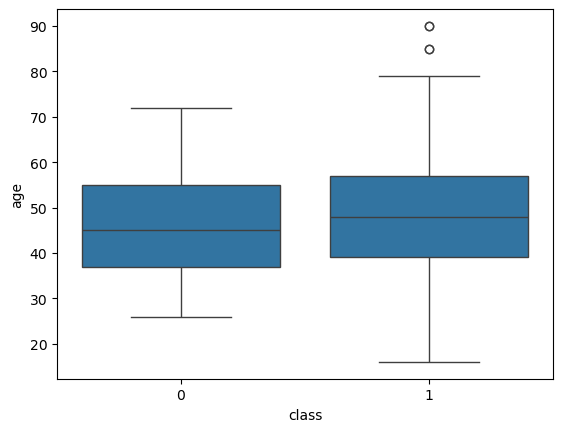

In [30]:
# is there a relationship between age and diabetic status
sns.boxplot(x=df['class'], y=df['age'])

In [32]:
no_diabetes = df[df['class'] == 0]
no_diabetes['age'].median()

45.0

In [38]:
diabetes = df[df['class'] == 1]
diabetes['age'].median()

48.0

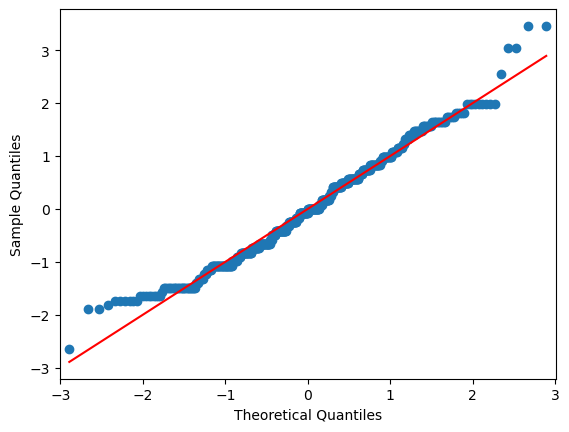

In [39]:
qqplot(df['age'], fit=True, line="s")
plt.show()

In [41]:
# conduct z test of differences
ztest(diabetes['age'], no_diabetes['age'])

(0.0, 1.0)

<Axes: >

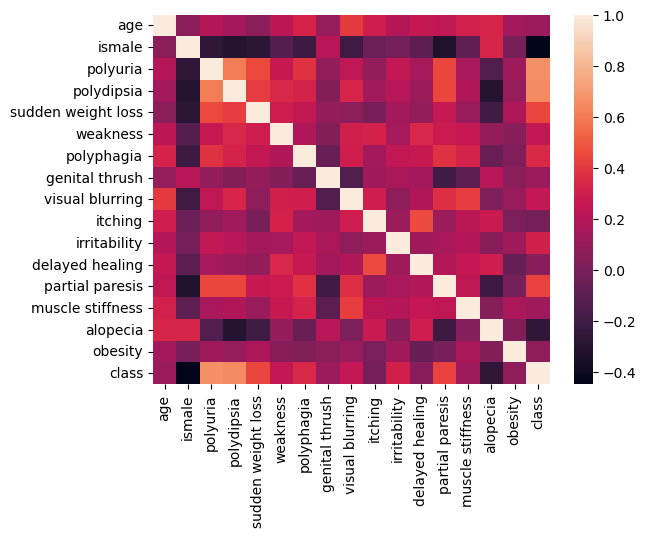

In [43]:
#  get cor relation plot
sns.heatmap(df.corr())